## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats


df = pd.read_csv("bikeshare.csv")
del df['datetime']

In [7]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 10.0)
#warnings.filterwarnings("ignore")

### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

In [3]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>, <AxesSubplot:>]],
      dtype=object)

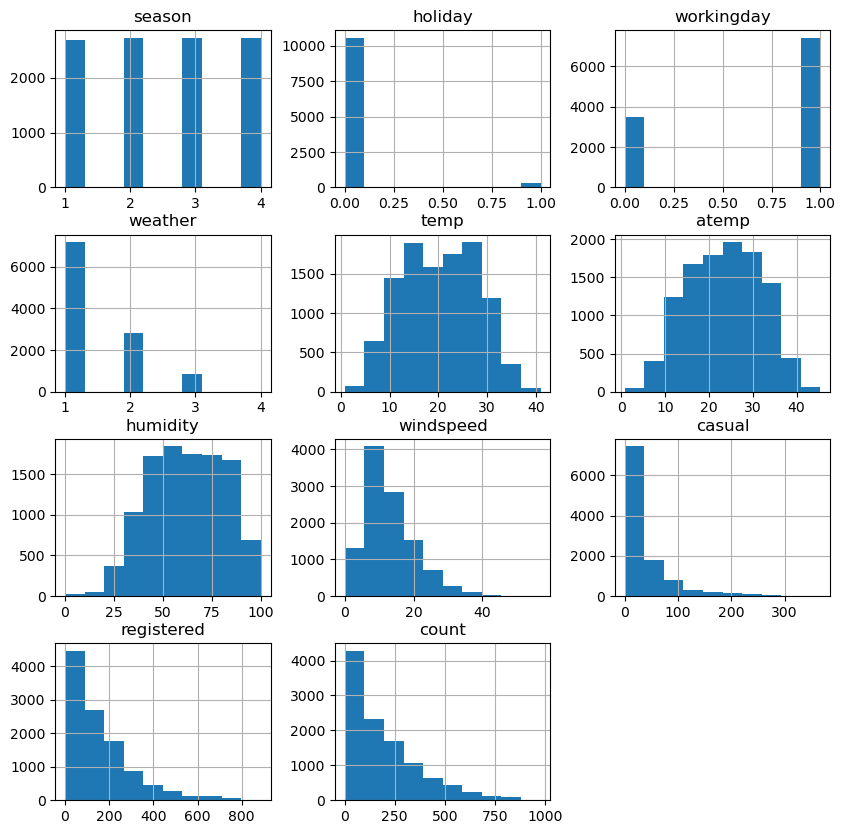

In [10]:
df.hist()

Как можем видеть, логарифмической шкалы требуют "casual","registered","count", и вероятно "windspeed", построим их.

array([[<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

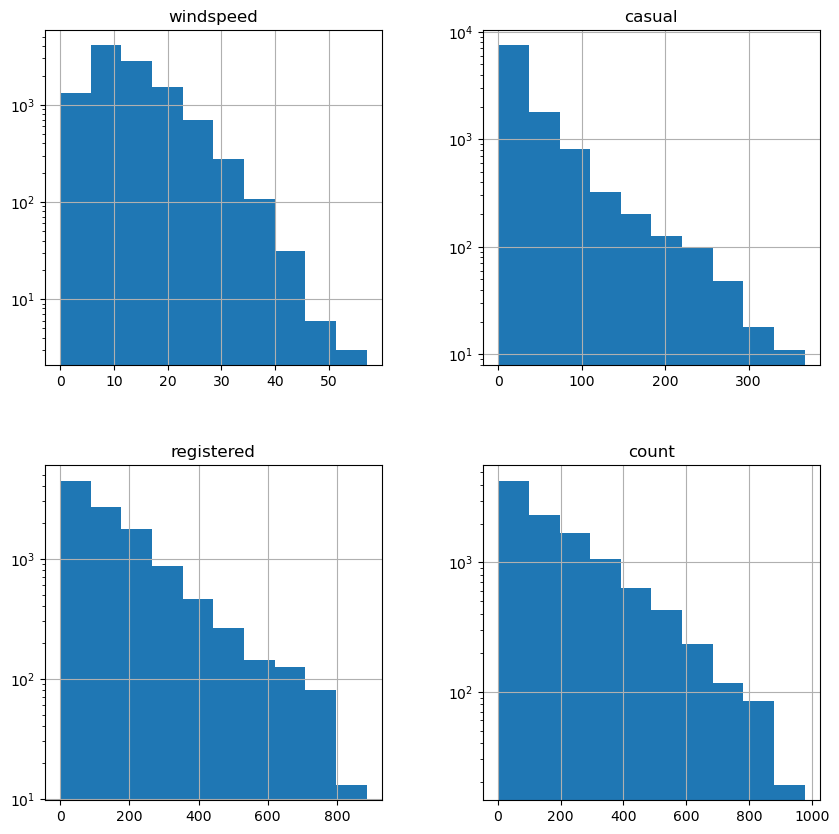

In [14]:
df[["windspeed", "casual","registered","count"]].hist(log=True)

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [15]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


По задаче не хватает 99 перцентиля

In [20]:
df.quantile([.5, .99]) # 50-ый для проверки

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0.50,3.0,0.0,1.0,1.0,20.50,24.24,62.0,12.9980,17.00,118.0,145.00
0.99,4.0,1.0,1.0,3.0,36.08,40.15,100.0,35.0008,240.15,697.0,774.15


### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [30]:
df_skew = np.round(skew(df, axis=0, bias=True), 2) # Округлил для упрощённого восприятия
dict_skew = dict(zip(df.columns, df_skew))
dict_skew

# Около 0 - симметрично, если отличается в какую-то сторону, значит в неё - перекос

{'season': -0.01,
 'holiday': 5.66,
 'workingday': -0.78,
 'weather': 1.24,
 'temp': 0.0,
 'atemp': -0.1,
 'humidity': -0.09,
 'windspeed': 0.59,
 'casual': 2.5,
 'registered': 1.52,
 'count': 1.24}

In [31]:
df_kurtosis = np.round(kurtosis(df, axis=0, bias=True), 2) # Округлил для упрощённого восприятия
dict_kurtosis = dict(zip(df.columns, df_kurtosis))
dict_kurtosis

# минус - больше в хвостах
# плюс - в голове
# около 0 - нормальное

{'season': -1.36,
 'holiday': 30.03,
 'workingday': -1.4,
 'weather': 0.39,
 'temp': -0.91,
 'atemp': -0.85,
 'humidity': -0.76,
 'windspeed': 0.63,
 'casual': 7.55,
 'registered': 2.62,
 'count': 1.3}

### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

In [32]:
df.var() # Как можем видеть, наибольшая дисперсия у count

season            1.245845
holiday           0.027755
workingday        0.217304
weather           0.401751
temp             60.708872
atemp            71.818856
humidity        370.371306
windspeed        66.659670
casual         2496.049219
registered    22812.789514
count         32813.313153
dtype: float64

In [33]:
def my_norm_confidence(df=df, column = "count", alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval

In [34]:
confidence = my_norm_confidence()
print(confidence)

(-163.46247359398893, 546.6107374190854)


Text(0.5, 1.0, 'Доверительный интервал')

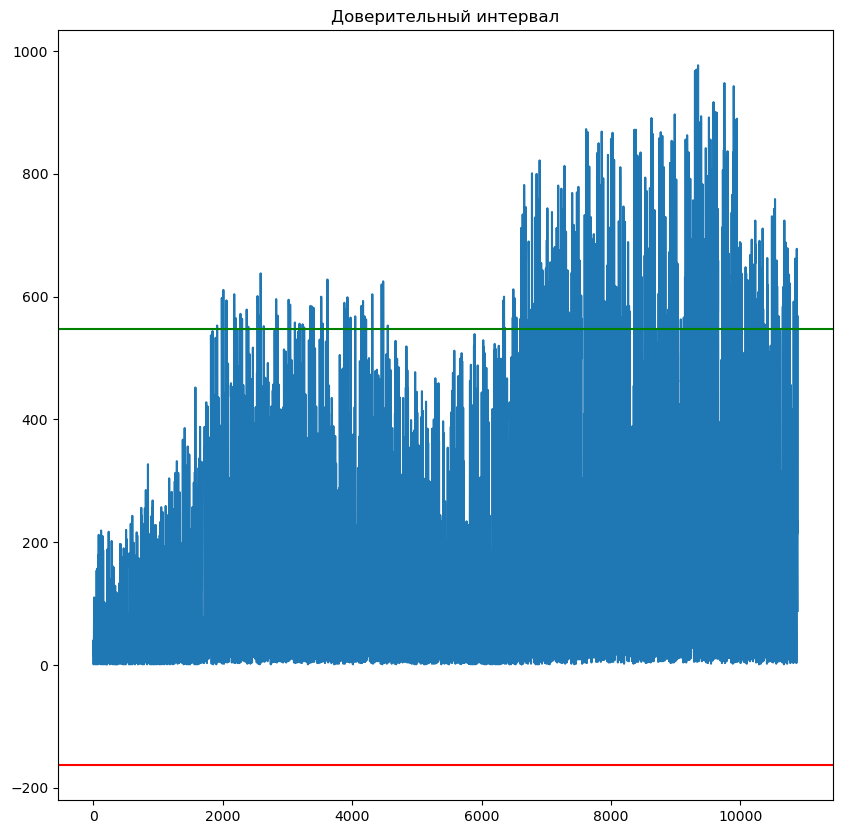

In [37]:
df["count"].plot()
plt.axhline(y=confidence[1], color="g", linestyle="-")
plt.axhline(y=confidence[0], color="r", linestyle="-")
plt.title("Доверительный интервал")

Как можем видеть, график ассимитричен, что объясняется тем, что количество не может быть меньше 0, а значит нижний интервал не имеет существенного значения

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [41]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [54]:
# Поиск количества аномалий выходящих за 3 сигма 

anomalies_3sigma = []

for colum in df.columns:
    df_colum = df[colum]
    upper_level = df[colum].mean() + 3*df[colum].std()
    lower_level = df[colum].mean() - 3*df[colum].std()
    anomalie_3sigma = df[(df[colum] >= upper_level)^(df[colum] <= lower_level)][colum].count()
    
    anomalies_3sigma.append(anomalie_3sigma)
    
    
dict_anomalies_3sigma = dict(zip(df.columns, anomalies_3sigma))

In [55]:
dict_anomalies_3sigma

{'season': 0,
 'holiday': 311,
 'workingday': 0,
 'weather': 1,
 'temp': 0,
 'atemp': 0,
 'humidity': 22,
 'windspeed': 67,
 'casual': 292,
 'registered': 235,
 'count': 147}

### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

<AxesSubplot:>

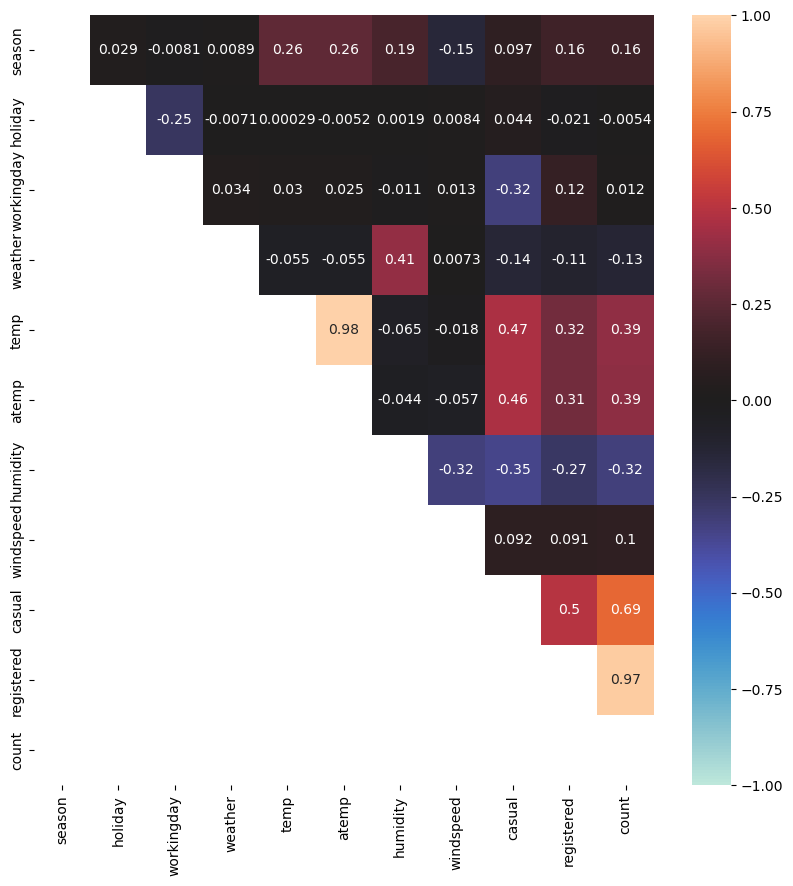

In [63]:
matrix = np.tril(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, mask=matrix)

Заметная корреляция наблюдается между
(registered и count)
и (temp, atemp)
и нормальная между ними и casual

Судя по значениям, эти показания зависимы